In [7]:
import numpy as np
import pandas as pd
import NelsonSiegelFunctions as nsf
from sklearn import datasets, linear_model

import pylab
import matplotlib.pyplot as plt
from scipy.optimize import fmin, minimize
from scipy.stats import skew, kurtosis

In [3]:
df = pd.read_csv("2016 2018 BPAM Yield Matrix.csv", index_col = 0)
df.index = pd.to_datetime(df.index)
df.columns = pd.to_numeric(df.columns.values)
df.head()

,3,6,12,24,36,60,84,120,180,240,300,360
2016-01-04,2.475,2.509,2.587,2.913,3.280,3.532,4.222,4.262,4.754,4.834,4.997,5.198
2016-01-05,2.469,2.503,2.580,2.916,3.295,3.512,4.180,4.275,4.765,4.846,5.010,5.214
2016-01-06,2.482,2.516,2.594,2.945,3.340,3.577,4.192,4.299,4.753,4.797,4.914,5.061
2016-01-07,2.543,2.577,2.656,2.986,3.357,3.592,4.189,4.304,4.758,4.801,4.919,5.068
2016-01-08,2.601,2.636,2.715,2.998,3.314,3.572,4.185,4.298,4.770,4.832,4.973,5.149


In [5]:
df= df[df.index > np.datetime64("2016-01-01")]
daily_params = nsf.getNSSParams(df)
daily_pred = nsf.getPred(df,daily_params)
nsf.getPredMatError(df,daily_pred)

C:\Users\shahmiraiman\Documents\Python Notebooks\Nelson-Siegel Git\NelsonSiegelFunctions.py:42: RuntimeWarning: overflow encountered in square
  e = lambda p, x, y: ((fp(p,x)-y)**2).sum()
C:\Users\shahmiraiman\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\shahmiraiman\Documents\Python Notebooks\Nelson-Siegel Git\NelsonSiegelFunctions.py:42: RuntimeWarning: overflow encountered in square
  e = lambda p, x, y: ((fp(p,x)-y)**2).sum()


{3: 0.021975787846689562,
 6: 0.011240997568443899,
 12: 0.03465923035034419,
 24: 0.02727852335785415,
 36: 0.041830594977815654,
 60: 0.055346941320116784,
 84: 0.06954362001268795,
 120: 0.10645714532605732,
 180: 0.07090829947908205,
 240: 0.07144846538183988,
 300: 0.036684548576928606,
 360: 0.050434320735290444}

In [21]:
regr = linear_model.LinearRegression()
d1=daily_params.loc[0].values[1:-1]
d0=daily_params.loc[0].values[0:-2]
regr.fit(np.reshape(d0,(d0.size,1)),d1)
error = regr.predict(np.reshape(d0,(d0.size,1)))-d1

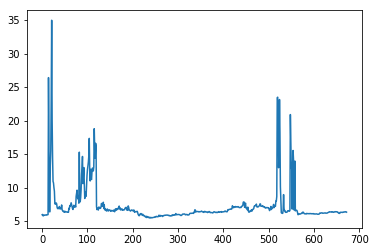

In [22]:
plt.plot(regr.predict(np.reshape(d0,(d0.size,1))))

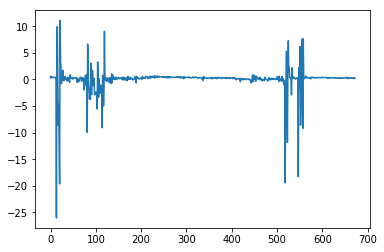

In [24]:
plt.plot(error)

In [29]:
daily_params.loc[0].values[50:100]

array([ 6.2515708 ,  6.08941671,  6.12900385,  6.12771238,  6.08973477,
        6.06291961,  6.0437901 ,  6.06558806,  6.0239853 ,  6.80436261,
        6.67307158,  7.30948153,  7.23590856,  7.5594422 ,  7.86599558,
        7.4993997 ,  7.18005682,  6.76087393,  6.5759179 ,  7.0451731 ,
        7.38992895,  7.01511783,  7.28424138,  7.32298093,  7.05142873,
        9.09248824,  9.75937985, 10.30156502,  8.83899978,  8.62660673,
        9.17324309,  7.79465153, 17.63134548,  8.64843621,  8.04936051,
        8.90499076, 10.45880233, 13.38744571, 14.71403268, 16.80129487,
       11.56089394, 13.14007786, 14.66480561, 11.26784741,  8.69474753,
        9.30743632,  9.95119944,  9.12275408, 11.11407321, 13.1371758 ])